In [1]:
from genesis import genesis_tools
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]
import numpy as np
import os
import time

In [2]:
# Point to my genesis binary, working directory
params = {'genesis_bin':os.path.expandvars('$HOME/Code/genesis/work/'),
    'genesis_bin':os.path.expandvars('$HOME/Code/genesis/bin/genesis'),
    }

In [3]:
g = genesis_tools.Genesis(**params)
g.sim_path

'/Users/chrisonian/work/genesis_run_mihpX7IIYl/'

In [4]:
# Turn on field output
g.input_params['idmpfld'] = 1
# Turn on particle output
g.input_params['idmppar'] = 1
g.input_params['npart'] = 2048

# Turn on history
g.input_params['ippart'] = 10
g.input_params['ipradi'] = 0
g.input_params['ncar']

251

In [5]:
#f.clean()
g.run_genesis()

init dir:  /Users/chrisonian/Code/GitHub/lume-genesis/examples
running genesis in /Users/chrisonian/work/genesis_run_mihpX7IIYl
Genesis.write_lattice - WARNING: ran out of quads for lattice...
-------------------------------
Genesis 1.3 has begun execution
(Version 1.0 Unix)

Please enter input file name 
***  Warning: external magnet definition too short for  quadrupole field             
***  Warning: Size of particle file [Mbytes]:  14     
Slice     1: Simulation  10% completed.
Slice     1: Simulation  20% completed.
Slice     1: Simulation  30% completed.
Slice     1: Simulation  40% completed.
Slice     1: Simulation  50% completed.
Slice     1: Simulation  60% completed.
Slice     1: Simulation  70% completed.
Slice     1: Simulation  80% completed.
Slice     1: Simulation  90% completed.
Slice     1: Simulation 100% completed.
***  writing history record for slice     1
***  closing files

Genesis run has finished
------------------------


In [6]:
[g.sim_path,
    g.genesis_bin]

['/Users/chrisonian/work/genesis_run_mihpX7IIYl/',
 '/Users/chrisonian/Code/genesis/bin/genesis']

In [7]:
!ls -ahl {g.sim_path}

total 34408
drwxr-xr-x  9 chrisonian  staff   288B Aug 31 10:21 .
drwxr-xr-x  3 chrisonian  staff    96B Aug 31 10:21 ..
-rw-r--r--  1 chrisonian  staff   2.0K Aug 31 10:21 genesis.in
-rw-r--r--  1 chrisonian  staff   640B Aug 31 10:21 genesis.lat
-rw-r--r--  1 chrisonian  staff   769B Aug 31 10:21 genesis.log
-rw-r--r--  1 chrisonian  staff   370K Aug 31 10:21 genesis.out
-rw-r--r--  1 chrisonian  staff   984K Aug 31 10:21 genesis.out.dfl
-rw-r--r--  1 chrisonian  staff    96K Aug 31 10:21 genesis.out.dpa
-rw-r--r--  1 chrisonian  staff    15M Aug 31 10:21 genesis.out.par


In [8]:
# Change dir for convenience
os.chdir(g.sim_path)
os.getcwd()

'/Users/chrisonian/work/genesis_run_mihpX7IIYl'

In [9]:
dat = g.read_output(column=0)

In [10]:
# Test Bokeh plotting
from bokeh.plotting import figure, output_file, show, output_notebook

#output_file("line.html")
output_notebook(verbose=False, hide_banner=True)

p = figure(plot_width=800, plot_height=400, y_axis_type='log')

# add a line renderer
p.line(dat[0],dat[1], line_width=2)

p.xaxis.axis_label = 'Z (M)'
p.yaxis.axis_label = 'power (W)'

show(p)

# Particle file

In [11]:
fname = g.sim_path+'genesis.out.par'
fname

'/Users/chrisonian/work/genesis_run_mihpX7IIYl/genesis.out.par'

In [12]:
pdat = np.fromfile(fname, dtype=np.float).astype(float)
npart = g.input_params['npart']
nbunch = int(len(pdat)/6/npart)
nbunch

157

In [13]:
# gamma, phase, x, y, px/mc, py/mc
b = pdat.reshape(nbunch,6,npart)

In [14]:
len(b[0][2])

2048

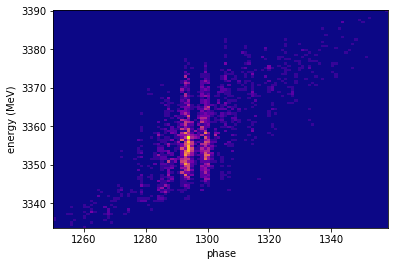

In [15]:
p = b[-1]
plt.hist2d(p[1], 0.511*p[0], bins=[100,100], cmap=plt.get_cmap('plasma'))
plt.xlabel('phase')
plt.ylabel('energy (MeV)')
plt.savefig('frame.png')
plt.show()

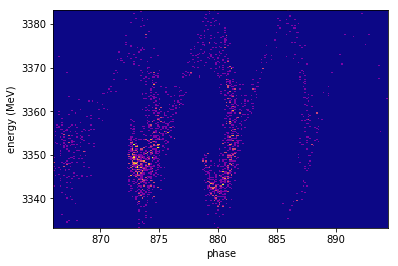

In [16]:
def frame(i, ):
    p = b[i]
    plt.hist2d(p[1], 0.511*p[0], bins=[200,200], cmap=plt.get_cmap('plasma'))
    plt.xlabel('phase')
    plt.ylabel('energy (MeV)')
    plt.savefig('frame_'+str(i)+'.png')
    
frame(100)

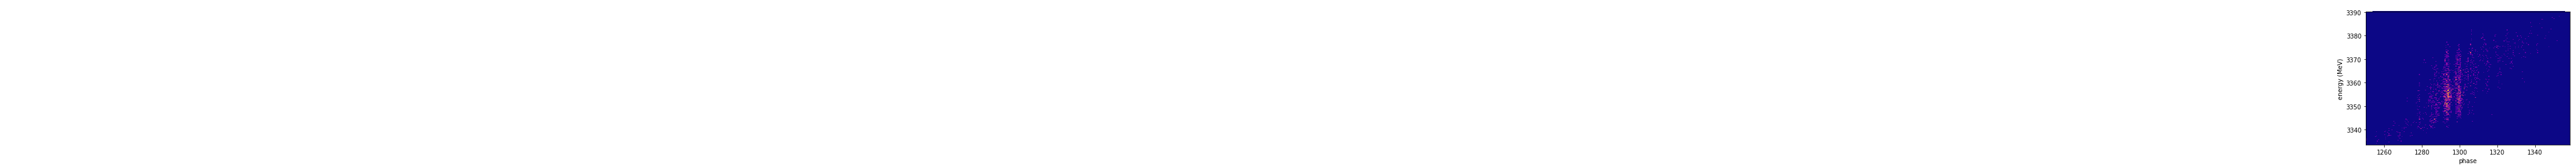

In [17]:
# Make frames
for i in range(nbunch):
    frame(i);

In [18]:
# Make movie
!ffmpeg -framerate 10 -i frame_%d.png -c:v libx264 -c:a libfdk_aac output.mp4

ffmpeg version 4.0.2 Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 9.1.0 (clang-902.0.39.2)
  configuration: --prefix=/opt/local --enable-swscale --enable-avfilter --enable-avresample --enable-libmp3lame --enable-libvorbis --enable-libopus --enable-librsvg --enable-libtheora --enable-libopenjpeg --enable-libmodplug --enable-libvpx --enable-libsoxr --enable-libspeex --enable-libass --enable-libbluray --enable-lzma --enable-gnutls --enable-fontconfig --enable-libfreetype --enable-libfribidi --disable-libjack --disable-libopencore-amrnb --disable-libopencore-amrwb --disable-libxcb --disable-libxcb-shm --disable-libxcb-xfixes --disable-indev=jack --enable-opencl --disable-outdev=xv --enable-audiotoolbox --enable-videotoolbox --enable-sdl2 --mandir=/opt/local/share/man --enable-shared --enable-pthreads --cc=/usr/bin/clang --arch=x86_64 --enable-x86asm --enable-libx265 --enable-gpl --enable-postproc --enable-libx264 --enable-libxvid
  libavutil      56. 14.100

In [19]:
g.clean()